In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

In [2]:
cols= """
Destination Port, 
Flow Duration, 
Total Fwd Packets, 
Total Backward Packets, 
Total Length of Fwd Packets, 
Total Length of Bwd Packets, 
Fwd Packet Length Max, 
Fwd Packet Length Min, 
Fwd Packet Length Mean, 
Fwd Packet Length Std, 
Bwd Packet Length Max, 
Bwd Packet Length Min, 
Bwd Packet Length Mean, 
Bwd Packet Length Std, 
Flow Bytes/s, 
Flow Packets/s, 
Flow IAT Mean, 
Flow IAT Std, 
Flow IAT Max, 
Flow IAT Min, 
Fwd IAT Total, 
Fwd IAT Mean, 
Fwd IAT Std, 
Fwd IAT Max, 
Fwd IAT Min, 
Bwd IAT Total, 
Bwd IAT Mean, 
Bwd IAT Std, 
Bwd IAT Max, 
Bwd IAT Min, 
Fwd PSH Flags, 
Bwd PSH Flags, 
Fwd URG Flags, 
Bwd URG Flags,
Fwd Header Length, 
Bwd Header Length, 
Fwd Packets/s, 
Bwd Packets/s, 
Min Packet Length, 
Max Packet Length, 
Packet Length Mean, 
Packet Length Std, 
Packet Length Variance, 
FIN Flag Count, 
SYN Flag Count, 
RST Flag Count, 
PSH Flag Count, 
ACK Flag Count, 
URG Flag Count, 
CWE Flag Count, 
ECE Flag Count, 
Down/Up Ratio, 
Average Packet Size, 
Avg Fwd Segment Size, 
Avg Bwd Segment Size, 
Fwd Header Length.1, 
Fwd Avg Bytes/Bulk, 
Fwd Avg Packets/Bulk, 
Fwd Avg Bulk Rate, 
Bwd Avg Bytes/Bulk, 
Bwd Avg Packets/Bulk, 
Bwd Avg Bulk Rate, 
Subflow Fwd Packets, 
Subflow Fwd Bytes, 
Subflow Bwd Packets, 
Subflow Bwd Bytes, 
Init_Win_bytes_forward, 
Init_Win_bytes_backward, 
act_data_pkt_fwd, 
min_seg_size_forward, 
Active Mean, 
Active Std, 
Active Max, 
Active Min, 
Idle Mean, 
Idle Std, 
Idle Max, 
Idle Min, Label"""



columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

#columns.append('Label')
#print(columns)
print(len(columns))

79


In [3]:
path = "Friday-WorkingHours-Afternoon-DDos.csv"
df = pd.read_csv(path)

df1=pd.read_csv("iscx/Friday-WorkingHours-Afternoon-DDos.csv")

df2=pd.read_csv("iscx/Friday-WorkingHours-Afternoon-PortScan.csv")
df3=pd.read_csv("iscx/Friday-WorkingHours-Morning.csv")
df4=pd.read_csv("iscx/Monday-WorkingHours.csv")
df5=pd.read_csv("iscx/Thursday-WorkingHours-Afternoon-Infilteration.csv")
df6=pd.read_csv("iscx/Thursday-WorkingHours-Morning-WebAttacks.csv")
df7=pd.read_csv("iscx/Tuesday-WorkingHours.csv")
df8=pd.read_csv("iscx/Wednesday-workingHours.csv")

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

C:\Users\Mohab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Mohab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df.shape

(2830743, 79)

In [5]:
#removing spaces at the beginning of feature names
df.columns = df.columns.str.lstrip()

In [6]:
#copy benign records into a dataframe
benign_df = df[df.Label == 'BENIGN']
benign_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
#remove benign records from original dataset
df = df[df.Label != 'BENIGN']
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,20,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,DDoS
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [8]:
df['Label'].value_counts()

DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: Label, dtype: int64

In [9]:
benign_df['Label'].value_counts()

BENIGN    2273097
Name: Label, dtype: int64

In [10]:
#removing half of benign records in the benign dataframe
print("benign dataframe shape before shrinking:")
print(benign_df.shape)

half_index = math.floor((len(benign_df.index))/2)
#print("\nhalf index = ")
#print(half_index)


#benign_df = benign_df.iloc[:half_index]
benign_df = benign_df.iloc[:250000]


print("\nbenign dataframe shape after shrinking:")
print(benign_df.shape)


benign dataframe shape before shrinking:
(2273097, 79)

benign dataframe shape after shrinking:
(250000, 79)


In [11]:
#concat half benign records to main dataframe
df=pd.concat([df, benign_df])

In [12]:
df['Label'].value_counts()

BENIGN                        250000
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: Label, dtype: int64

In [13]:
#copy DoS records into a dataframe

#dos_df1 = df[df.Label == 'BENIGN']
dos_df2 = df[df.Label == 'DoS Hulk']
dos_df3 = df[df.Label == 'DDoS']
dos_df4 = df[df.Label == 'DoS GoldenEye']
dos_df5 = df[df.Label == 'DoS slowloris']
dos_df6 = df[df.Label == 'DoS Slowhttptest']
dos_df = pd.concat([dos_df2, dos_df3, dos_df4, dos_df5, dos_df6])
dos_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
74860,80,1878,3,6,382,11595,382,0,127.333333,220.547803,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
74861,80,1550,3,6,372,11595,372,0,124.000000,214.774300,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
74862,80,497,4,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
74863,80,1893,3,7,348,11595,348,0,116.000000,200.917894,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
74864,80,1942,3,6,351,11595,351,0,117.000000,202.649945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk


In [14]:
dos_df['Label'].value_counts()

DoS Hulk            231073
DDoS                128027
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Name: Label, dtype: int64

In [15]:
print(dos_df.shape)

(380688, 79)


In [16]:
dos_df.dtypes

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                           object
Length: 79, dtype: object

In [17]:
dos_df.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [18]:
#cleaning null values in features
dos_df[dos_df.isnull().any(axis=1)]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
74874,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
74996,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
75128,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
75311,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
75535,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326337,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
326411,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
326451,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk
326483,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk


In [19]:
#Label encoding starts here
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
onehot = OneHotEncoder()

In [20]:
#finding categorical (dtype: object) features
obj_df = dos_df.select_dtypes(include=['object']).copy()
obj_df.head()

,Flow Bytes/s,Flow Packets/s,Label
74860,6.37753e+06,4792.332268,DoS Hulk
74861,7.72065e+06,5806.451613,DoS Hulk
74862,0,8048.289738,DoS Hulk
74863,6.30903e+06,5282.62018,DoS Hulk
74864,6.15139e+06,4634.397528,DoS Hulk


In [21]:
Labels = dos_df['Label'].unique()
for label in Labels:
    print(label)

DoS Hulk
DDoS
DoS GoldenEye
DoS slowloris
DoS Slowhttptest


In [22]:
#df['Label'] = encoder.fit_transform(df['Label'])

In [23]:
#df.apply(LabelEncoder().fit_transform)

In [24]:
#df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
#df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
#df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")

In [25]:
#Finding categorical features
num_cols = dos_df._get_numeric_data().columns

cate_cols = list(set(dos_df.columns)-set(num_cols))

cate_cols

['Flow Packets/s', 'Label', 'Flow Bytes/s']

In [26]:
dos_df.drop('Flow Packets/s',axis = 1,inplace= True)

In [27]:
dos_df.drop('Flow Bytes/s',axis = 1,inplace= True)

In [28]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

Fwd Avg Packets/Bulk    0.000000e+00
CWE Flag Count          0.000000e+00
Bwd URG Flags           0.000000e+00
Fwd URG Flags           0.000000e+00
Bwd PSH Flags           0.000000e+00
                            ...     
Flow IAT Max            3.734675e+07
Idle Max                3.746995e+07
Fwd IAT Max             3.754907e+07
Flow Duration           4.003870e+07
Fwd IAT Total           4.010206e+07
Length: 76, dtype: float64

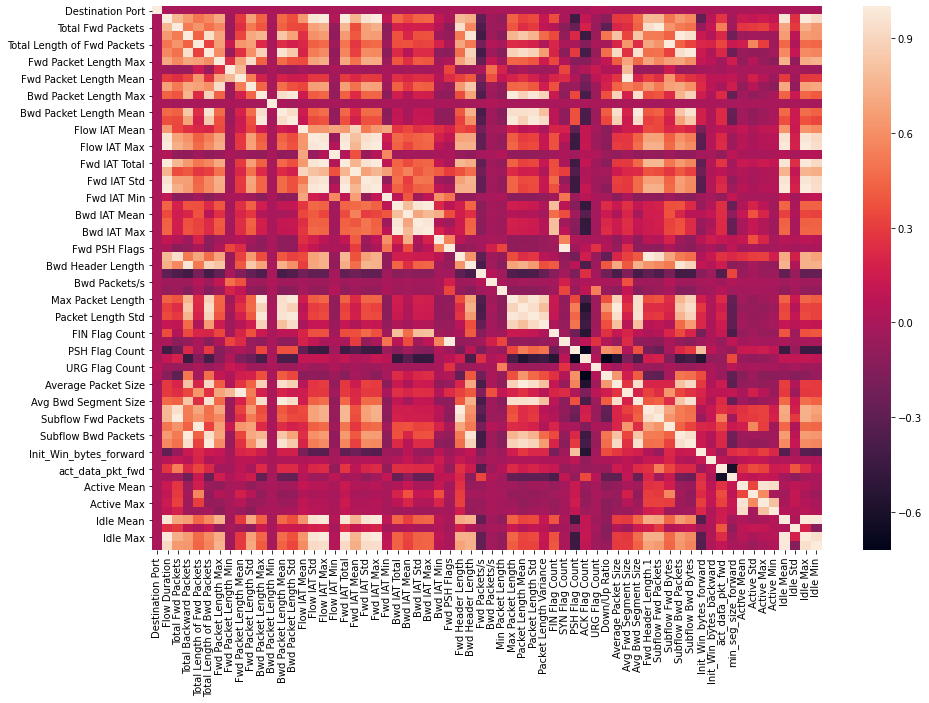

In [29]:
dos_df = dos_df.dropna('columns')# drop columns with NaN

dos_df = dos_df[[col for col in dos_df if dos_df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = dos_df.corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr)
#sns.set(font_scale=1.6)


plt.show()

#user better statistical tool to perform better feature selection

In [30]:
dos_df.shape

(380688, 65)

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [32]:
#df = df.drop(['target',], axis=1)
print(dos_df.shape)

# Target variable and train set
Y = dos_df[['Label']]
X = dos_df.drop(['Label',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(380688, 65)
(255060, 64) (125628, 64)
(255060, 1) (125628, 1)


In [38]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(random_state=1,learning_rate=0.01)


In [39]:
start_time = time.time()
xgb_clf.fit(X_train, Y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  48.99655055999756


In [40]:
start_time = time.time()
Y_test_pred_xgb = xgb_clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.401364803314209


In [41]:
print("Train score is:", xgb_clf.score(X_train, Y_train))
print("Test score is:",xgb_clf.score(X_test, Y_test))

Train score is: 0.9975456755273269
Test score is: 0.9973891170758111


In [42]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_xgb))

                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       1.00      0.95      0.97      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       0.99      0.98      0.99      1766
   DoS slowloris       0.99      0.94      0.97      1943

        accuracy                           1.00    125628
       macro avg       1.00      0.97      0.98    125628
    weighted avg       1.00      1.00      1.00    125628



In [157]:
#SupportVectorMachine starts here
from sklearn import svm
clf=svm.SVC()

In [158]:
start_time = time.time()
clf.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training time:  1732.8419575691223


In [160]:
start_time = time.time()
Y_test_pred_SVM = clf.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  57.39218616485596


In [161]:
print("Train score is:", clf.score(X_train, Y_train))
print("Test score is:",clf.score(X_test,Y_test))

Train score is: 0.9959225280326198
Test score is: 0.996019995542395


In [163]:
pred_clf=clf.predict(X_test)

In [164]:
sklearn.metrics.accuracy_score(Y_test, Y_test_pred_SVM)

0.996019995542395

In [165]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42333
           1       0.99      0.95      0.97      3350
           2       1.00      1.00      1.00     76236
           3       0.89      0.92      0.91      1766
           4       0.93      0.94      0.94      1943

    accuracy                           1.00    125628
   macro avg       0.96      0.96      0.96    125628
weighted avg       1.00      1.00      1.00    125628



In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
start_time = time.time()
knn.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  175.17535305023193


In [89]:
start_time = time.time()
pred_knn=knn.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  48.63588309288025


In [90]:
sklearn.metrics.accuracy_score(Y_test, pred_knn)

0.9996736396344764

In [91]:
print(sklearn.metrics.classification_report(Y_test, pred_knn))

                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       1.00      1.00      1.00      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       0.99      0.99      0.99      1766
   DoS slowloris       0.99      0.99      0.99      1943

        accuracy                           1.00    125628
       macro avg       1.00      1.00      1.00    125628
    weighted avg       1.00      1.00      1.00    125628



In [83]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [84]:
start_time = time.time()
NB.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.5895345211029053


In [85]:
start_time = time.time()
Y_test_pred_NB = NB.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.4253871440887451


In [86]:
print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.9555947620167804
Test score is: 0.9560368707612953


In [87]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_NB))

                  precision    recall  f1-score   support

            DDoS       0.99      1.00      0.99     42333
   DoS GoldenEye       0.45      0.99      0.62      3350
        DoS Hulk       1.00      0.94      0.97     76236
DoS Slowhttptest       0.87      0.72      0.79      1766
   DoS slowloris       0.72      0.92      0.80      1943

        accuracy                           0.96    125628
       macro avg       0.81      0.91      0.83    125628
    weighted avg       0.97      0.96      0.96    125628



In [48]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [49]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  3.085806131362915


In [50]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.028025150299072266


In [51]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9767074413863405
Test score is: 0.9771547744133473
                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       0.71      0.78      0.74      3350
        DoS Hulk       0.98      1.00      0.99     76236
DoS Slowhttptest       1.00      0.59      0.74      1766
   DoS slowloris       0.58      0.33      0.42      1943

        accuracy                           0.98    125628
       macro avg       0.86      0.74      0.78    125628
    weighted avg       0.98      0.98      0.97    125628



In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30)

In [53]:
start_time = time.time()
RF.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  9.338491201400757


In [54]:
start_time = time.time()
Y_test_pred_RF = RF.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.2792541980743408


In [55]:
print("Train score is:", RF.score(X_train, Y_train))
print("Test score is:",RF.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_RF))

Train score is: 0.9999529522465302
Test score is: 0.9997293596968828
                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       1.00      1.00      1.00      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       1.00      1.00      1.00      1766
   DoS slowloris       1.00      1.00      1.00      1943

        accuracy                           1.00    125628
       macro avg       1.00      1.00      1.00    125628
    weighted avg       1.00      1.00      1.00    125628



In [56]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1200000)

In [57]:
start_time = time.time()
LR.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time:  24.273073434829712


In [58]:
start_time = time.time()
Y_test_pred_LR = LR.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.0320284366607666


In [59]:
print("Train score is:", LR.score(X_train, Y_train))
print("Test score is:",LR.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_LR))

Train score is: 0.996087195169764
Test score is: 0.9963065558633426
                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       0.98      0.97      0.97      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       0.95      0.93      0.94      1766
   DoS slowloris       0.94      0.95      0.95      1943

        accuracy                           1.00    125628
       macro avg       0.97      0.97      0.97    125628
    weighted avg       1.00      1.00      1.00    125628



In [92]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [93]:
start_time = time.time()
GBC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  491.7695195674896


In [94]:
start_time = time.time()
Y_test_pred_GBC = GBC.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  1.1040050983428955


In [95]:
print("Train score is:", GBC.score(X_train, Y_train))
print("Test score is:", GBC.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_GBC))

Train score is: 0.9998666980318357
Test score is: 0.999737319705798
                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       1.00      1.00      1.00      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       1.00      1.00      1.00      1766
   DoS slowloris       1.00      1.00      1.00      1943

        accuracy                           1.00    125628
       macro avg       1.00      1.00      1.00    125628
    weighted avg       1.00      1.00      1.00    125628



In [69]:
#Keras Classifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [70]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(len(dos_df.columns), input_dim =len(dos_df.columns)-1, activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(len(dos_df['Label'].unique()),activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [71]:
KC = KerasClassifier(build_fn=fun,epochs=50,batch_size=len(dos_df.columns))

In [72]:
start = time.time()
KC.fit(X_train, Y_train.values.ravel())
end = time.time()


Epoch 1/50
255060/255060 [==============================] - 2s 10us/step - loss: 0.9278 - accuracy: 0.5994
Epoch 2/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.4699 - accuracy: 0.8363
Epoch 3/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3544 - accuracy: 0.9046
Epoch 4/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3532 - accuracy: 0.9046
Epoch 5/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3529 - accuracy: 0.9046
Epoch 6/50
255060/255060 [==============================] - 2s 10us/step - loss: 0.3527 - accuracy: 0.9046
Epoch 7/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3525 - accuracy: 0.9046
Epoch 8/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3523 - accuracy: 0.9046
Epoch 9/50
255060/255060 [==============================] - 2s 9us/step - loss: 0.3522 - accuracy: 0.9046
Epoch 10/50
255060/255060 [================

In [73]:
print('Training time')
print((end-start))

Training time
113.19192433357239


In [74]:
start_time = time.time()
Y_test_pred_KC = KC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.36032938957214355


In [75]:
start_time = time.time()
Y_train_pred_KC = KC.predict(X_train)
end_time = time.time()
print(accuracy_score(Y_train,Y_train_pred_KC))
print(accuracy_score(Y_test,Y_test_pred_KC))

0.9984082176742727
0.9980975578692648


In [76]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_KC))

                  precision    recall  f1-score   support

            DDoS       1.00      1.00      1.00     42333
   DoS GoldenEye       0.99      0.99      0.99      3350
        DoS Hulk       1.00      1.00      1.00     76236
DoS Slowhttptest       0.99      0.92      0.95      1766
   DoS slowloris       1.00      0.97      0.99      1943

        accuracy                           1.00    125628
       macro avg       0.99      0.98      0.99    125628
    weighted avg       1.00      1.00      1.00    125628



In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [97]:
adaclf = AdaBoostClassifier(n_estimators=20)
scores = cross_val_score(adaclf, X_test, Y_test, cv=5)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [98]:
scores.mean()

0.7743679933802831

In [99]:
#Adaptive Boosting Classifier

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=20)

In [100]:
start_time = time.time()
adaclf.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  23.24513864517212


In [101]:
start_time = time.time()
Y_test_pred_ada = adaclf.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.7676992416381836


In [102]:
print("Train score is:", adaclf.score(X_train, Y_train))
print("Test score is:", adaclf.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_ada))

Train score is: 0.9726887791107974
Test score is: 0.9731508899289967
                  precision    recall  f1-score   support

            DDoS       1.00      0.98      0.99     42333
   DoS GoldenEye       0.74      0.76      0.75      3350
        DoS Hulk       0.98      0.99      0.99     76236
DoS Slowhttptest       0.85      0.81      0.83      1766
   DoS slowloris       0.54      0.56      0.55      1943

        accuracy                           0.97    125628
       macro avg       0.82      0.82      0.82    125628
    weighted avg       0.97      0.97      0.97    125628



In [113]:
Y_train.head()

,Label
98332,DDoS
518466,DoS GoldenEye
39224,DDoS
55584,DDoS
140503,DoS Hulk


In [125]:
Y_test.head()

,Label
113310,DoS Hulk
161464,DoS Hulk
169312,DoS Hulk
73365,DDoS
45214,DDoS


In [126]:
Y_train_encoded = Y_train
Y_test_encoded = Y_test

In [127]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train_encoded['Label'] = encoder.fit_transform(Y_train_encoded['Label'])
Y_test_encoded['Label'] = encoder.fit_transform(Y_test_encoded['Label'])

C:\Users\Mohab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mohab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [128]:
Y_train_encoded.head()

,Label
98332,0
518466,1
39224,0
55584,0
140503,2


In [129]:
Y_test_encoded.head()

,Label
113310,2
161464,2
169312,2
73365,0
45214,0


In [138]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [139]:
estimator = [] 
estimator.append(('GNB',  GaussianNB())) 
estimator.append(('RF', RandomForestClassifier(n_estimators=30))) 
estimator.append(('DT', DecisionTreeClassifier())) 


In [140]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, Y_train_encoded) 
y_pred = vot_hard.predict(X_test) 

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [141]:
# using accuracy_score metric to predict accuracy 
score = accuracy_score(Y_test_encoded, y_pred) 
print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [142]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, Y_train_encoded) 
y_pred = vot_soft.predict(X_test) 

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [143]:
# using accuracy_score 
score = accuracy_score(Y_test_encoded, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


In [144]:
GNB_clf = GaussianNB()
RF_clf = RandomForestClassifier(n_estimators=30)
DT_clf = DecisionTreeClassifier()

GNB_clf.fit(X_train, Y_train_encoded)
RF_clf.fit(X_train, Y_train_encoded)
DT_clf.fit(X_train, Y_train_encoded)

GNB_pred = GNB_clf.predict(X_test)
RF_pred = RF_clf.predict(X_test)
DT_pred = DT_clf.predict(X_test)

averaged_preds = (GNB_pred + RF_pred + DT_pred)//3
acc = accuracy_score(Y_test_encoded, averaged_preds)
print(acc)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.962205877670583


In [145]:
#print(GNB_pred)
import sklearn
GNB_report = sklearn.metrics.classification_report(Y_test_encoded, GNB_pred)
print("Gaussian Naive Bayes: \n" + GNB_report)
RF_report = sklearn.metrics.classification_report(Y_test_encoded, RF_pred)
print("Random Forest: \n" + RF_report)
DT_report = sklearn.metrics.classification_report(Y_test_encoded, DT_pred)
print("Decision Tree: \n" + DT_report)

Gaussian Naive Bayes: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     42333
           1       0.45      0.99      0.62      3350
           2       1.00      0.94      0.97     76236
           3       0.87      0.72      0.79      1766
           4       0.72      0.92      0.80      1943

    accuracy                           0.96    125628
   macro avg       0.81      0.91      0.83    125628
weighted avg       0.97      0.96      0.96    125628

Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42333
           1       1.00      1.00      1.00      3350
           2       1.00      1.00      1.00     76236
           3       1.00      1.00      1.00      1766
           4       1.00      1.00      1.00      1943

    accuracy                           1.00    125628
   macro avg       1.00      1.00      1.00    125628
weighted avg       1.00      1.00     

In [146]:
print(GNB_pred)
print(RF_pred)
print(DT_pred)
GNB_pred = encoder.fit_transform(GNB_pred)
RF_pred = encoder.fit_transform(RF_pred)
DT_pred = encoder.fit_transform(DT_pred)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]


In [147]:
averaged_preds = GNB_pred + RF_pred + DT_pred
print(averaged_preds)

[6 6 6 ... 6 6 6]


In [148]:
averaged_preds = (GNB_pred + RF_pred + DT_pred)//3
acc = accuracy_score(Y_test_encoded, averaged_preds)
print(acc)

0.962205877670583


In [149]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

voting_clf = VotingClassifier(estimators=[('GNB', GNB_clf), ('RF', RF_clf), ('DT', DT_clf)], voting='hard')
voting_clf.fit(X_train, Y_train_encoded)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test_encoded, preds)

print("Accuracy is: " + str(acc))

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy is: 0.999697519661222


In [150]:
f1 = f1_score(Y_test_encoded, preds, average='weighted')
print("weighted f1: ")
print(f1)
f1 = f1_score(Y_test_encoded, preds, average='macro')
print("\nmacro f1: ")
print(f1)
f1 = f1_score(Y_test_encoded, preds, average='micro')
print("\nmicro f1: ")
print(f1)
acc = accuracy_score(Y_test_encoded, preds)
print("\nAccuracy")
print(acc)

weighted f1: 
0.9996974167235467

macro f1: 
0.99781391562918

micro f1: 
0.999697519661222

Accuracy
0.999697519661222


In [151]:
print(sklearn.metrics.classification_report(Y_test_encoded, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42333
           1       1.00      1.00      1.00      3350
           2       1.00      1.00      1.00     76236
           3       1.00      0.99      1.00      1766
           4       1.00      1.00      1.00      1943

    accuracy                           1.00    125628
   macro avg       1.00      1.00      1.00    125628
weighted avg       1.00      1.00      1.00    125628



In [152]:
preds.shape

(125628,)

In [153]:
pred = vot_soft.predict_proba(X_test)
l_loss = log_loss(Y_test_encoded, pred)
f1 = f1_score(Y_test_encoded, preds, average='weighted')

print("Accuracy is: " + str(acc))
print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

Accuracy is: 0.999697519661222
Log Loss is: 0.019832203387413105
F1 Score is: 0.9996974167235467
